In [2]:
#Importar bibliotecas
import numpy as np
import tensorflow as tf

2023-07-29 18:19:35.538146: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-29 18:19:36.226248: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
#Configurar variáveis
dataset_input = "bin/dataset_input.txt"
dataset_output = "bin/dataset_output.txt"

In [5]:
#Inputando os dados
inputMatrix = np.loadtxt(dataset_input,dtype=float,delimiter=";")
outputMatrix = np.loadtxt(dataset_output,dtype=float,delimiter=";")
#outputMatrix = np.array([(120, 5,120),
#                         (123,24,100),
#                         (154, 3,121)],dtype=float)
for i,c in enumerate(inputMatrix):
    print("{}Input Matrix={}Output Matrix".format(c,outputMatrix[i]))

[ 7.75748748e+06 -3.63640637e+05 -7.15000000e-01  8.55000000e+00
  7.75747976e+06 -3.63633263e+05 -8.56000000e-01  0.00000000e+00
 -1.10000000e-02]Input Matrix=[ 0.    -0.011  0.02 ]Output Matrix
[ 7.75748748e+06 -3.63640637e+05 -7.15000000e-01  8.55000000e+00
  7.75747976e+06 -3.63633263e+05 -8.56000000e-01  0.00000000e+00
 -2.00000000e-03]Input Matrix=[ 0.    -0.002  0.02 ]Output Matrix
[ 7.75748748e+06 -3.63640637e+05 -7.15000000e-01  8.55000000e+00
  7.75747976e+06 -3.63633262e+05 -8.56000000e-01  0.00000000e+00
  1.70000000e-02]Input Matrix=[0.    0.017 0.02 ]Output Matrix
[ 7.75748748e+06 -3.63640637e+05 -7.15000000e-01  8.55000000e+00
  7.75747976e+06 -3.63633266e+05 -8.56000000e-01  0.00000000e+00
  3.60000000e-02]Input Matrix=[0.    0.036 0.02 ]Output Matrix
[ 7.75748748e+06 -3.63640637e+05 -7.15000000e-01  8.55000000e+00
  7.75747976e+06 -3.63633260e+05 -8.56000000e-01  0.00000000e+00
  5.90000000e-02]Input Matrix=[0.    0.059 0.02 ]Output Matrix
[ 7.75748748e+06 -3.63640637e

In [20]:
inputMatrix.view()

array([[100.  , 230.  ,   0.95, 100.  ],
       [200.  , 245.  ,   0.99, 121.  ],
       [ 40.  , 250.  ,   0.91, 123.  ]])

In [21]:
#Inputando os dados
inputMatrix = np.array([(100,230,0.95,100),
                        (200,245,0.99,121),
                        ( 40,250,0.91,123)],dtype=float)
outputMatrix = np.array([(120, 5,120),
                         (123,24,100),
                         (154, 3,121)],dtype=float)
for i,c in enumerate(inputMatrix):
    print("{}Input Matrix={}Output Matrix".format(c,outputMatrix[i]))

[100.   230.     0.95 100.  ]Input Matrix=[120.   5. 120.]Output Matrix
[200.   245.     0.99 121.  ]Input Matrix=[123.  24. 100.]Output Matrix
[ 40.   250.     0.91 123.  ]Input Matrix=[154.   3. 121.]Output Matrix


In [49]:
#Entrada dos dados: current x, current y, current phi, current v, current theta, goal_pose x, goal_pose y, goal_pose theta, target v
inputMatrix = np.array([(7757517.727,-363656.637,0.025,3.202,-0.251,7757527.998,-363658.752,-0.149,8.55)],dtype=float)

#Saida dos dados: v, phi, t:
outputMatrix = np.array([(3.218,0.025,0.020)],dtype=float)

for i,c in enumerate(inputMatrix):
    print("{}Input Matrix={}Output Matrix".format(c,outputMatrix[i]))

[ 7.75751773e+06 -3.63656637e+05  2.50000000e-02  3.20200000e+00
 -2.51000000e-01  7.75752800e+06 -3.63658752e+05 -1.49000000e-01
  8.55000000e+00]Input Matrix=[3.218 0.025 0.02 ]Output Matrix


In [12]:
#Criando o modelo 
l0 = tf.keras.layers.Dense(units = 9, input_shape = [9])
l1 = tf.keras.layers.Dense(units = 144)
l2 = tf.keras.layers.Dense(units = 288)
l3 = tf.keras.layers.Dense(units = 3)

"""Modelo inicial: 
l0 = tf.keras.layers.Dense(units = 4, input_shape = [9])
l1 = tf.keras.layers.Dense(units = 64)
l2 = tf.keras.layers.Dense(units = 128)
l3 = tf.keras.layers.Dense(units = 3) """

model = tf.keras.Sequential([l0,l1,l2,l3])

In [13]:
#Compilando o modelo
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))

In [14]:
#Treinar o modelo
history = model.fit(inputMatrix,outputMatrix,epochs=500,verbose=False)
print("Finished training the model!")

Finished training the model!


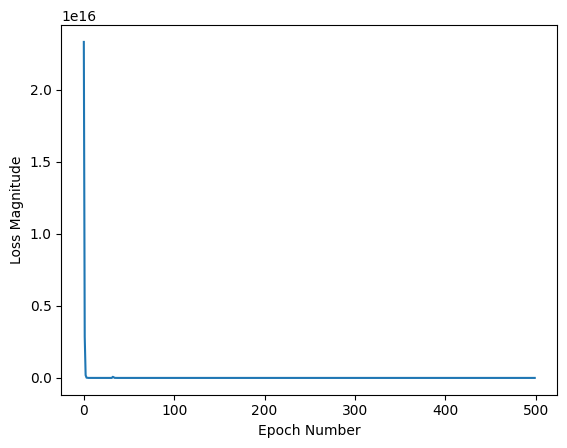

In [15]:
#Exibir estatísticas do treino
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel('Loss Magnitude')
plt.plot(history.history['loss'])

In [17]:
#Predição do resultado (minha nn)

#Entrada dos dados: current x, current y, current phi, current v, current theta, goal_pose x, goal_pose y, goal_pose theta, target v
#print(model.predict(np.array([7757517.891,-363656.678,-0.250,3.260,-0.250,7757528.493,-363658.826,-0.144,8.55]).reshape(1,9)))
print(model.predict(np.array([7757527.502,-363658.677,-0.154,8.550,7757499.058,-363648.787,-0.527,7.656,0.033]).reshape(1,9)))
#output esperado: 7.656;0.033;0.020
#predição: (v, phi, t)

"""Predição do resultado original
print(model.predict(np.array([120,260,0.98,110]).reshape(1,4)))"""

1/1 [==============================] - 0s 15ms/step
[[-251.11992  141.00352   93.31568]]


'Predição do resultado original\nprint(model.predict(np.array([120,260,0.98,110]).reshape(1,4)))'